# Data Challenge Text-Mining Green Way

* Joanna Siy Haacke
* Kailash Padhiyar 
* Sebastian Zabala

## Reading the data

In [161]:
# Libraries import
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
import requests
from bs4 import BeautifulSoup
from copy import copy

In [162]:
# Load the dataset
import pandas as pd
file_path = 'E:/python/Dataset/OnlineNewsPopularity.csv'
df = pd.read_csv("OnlineNewsPopularity.csv")
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [163]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

# Data Preparation 

In [165]:
#Removing Space Character from Feature names
df.columns = df.columns.str.replace(' ', '')

In [166]:
# describing the data
df.describe()
# from the data, there will be need to normailze the data if their will be need for condersing any machine learning model.

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [167]:
df.shape

(39644, 61)

In [168]:
df.shape  # there are no duplicates

(39644, 61)

In [169]:
# removing duplicates
df=df.drop_duplicates()

In [170]:
#checking for all variables that contain missing values
n=df.isna().sum()
n[n>0] # there are no duplicates

Series([], dtype: int64)

In [171]:
df.dtypes

url                              object
timedelta                       float64
n_tokens_title                  float64
n_tokens_content                float64
n_unique_tokens                 float64
                                 ...   
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
shares                            int64
Length: 61, dtype: object

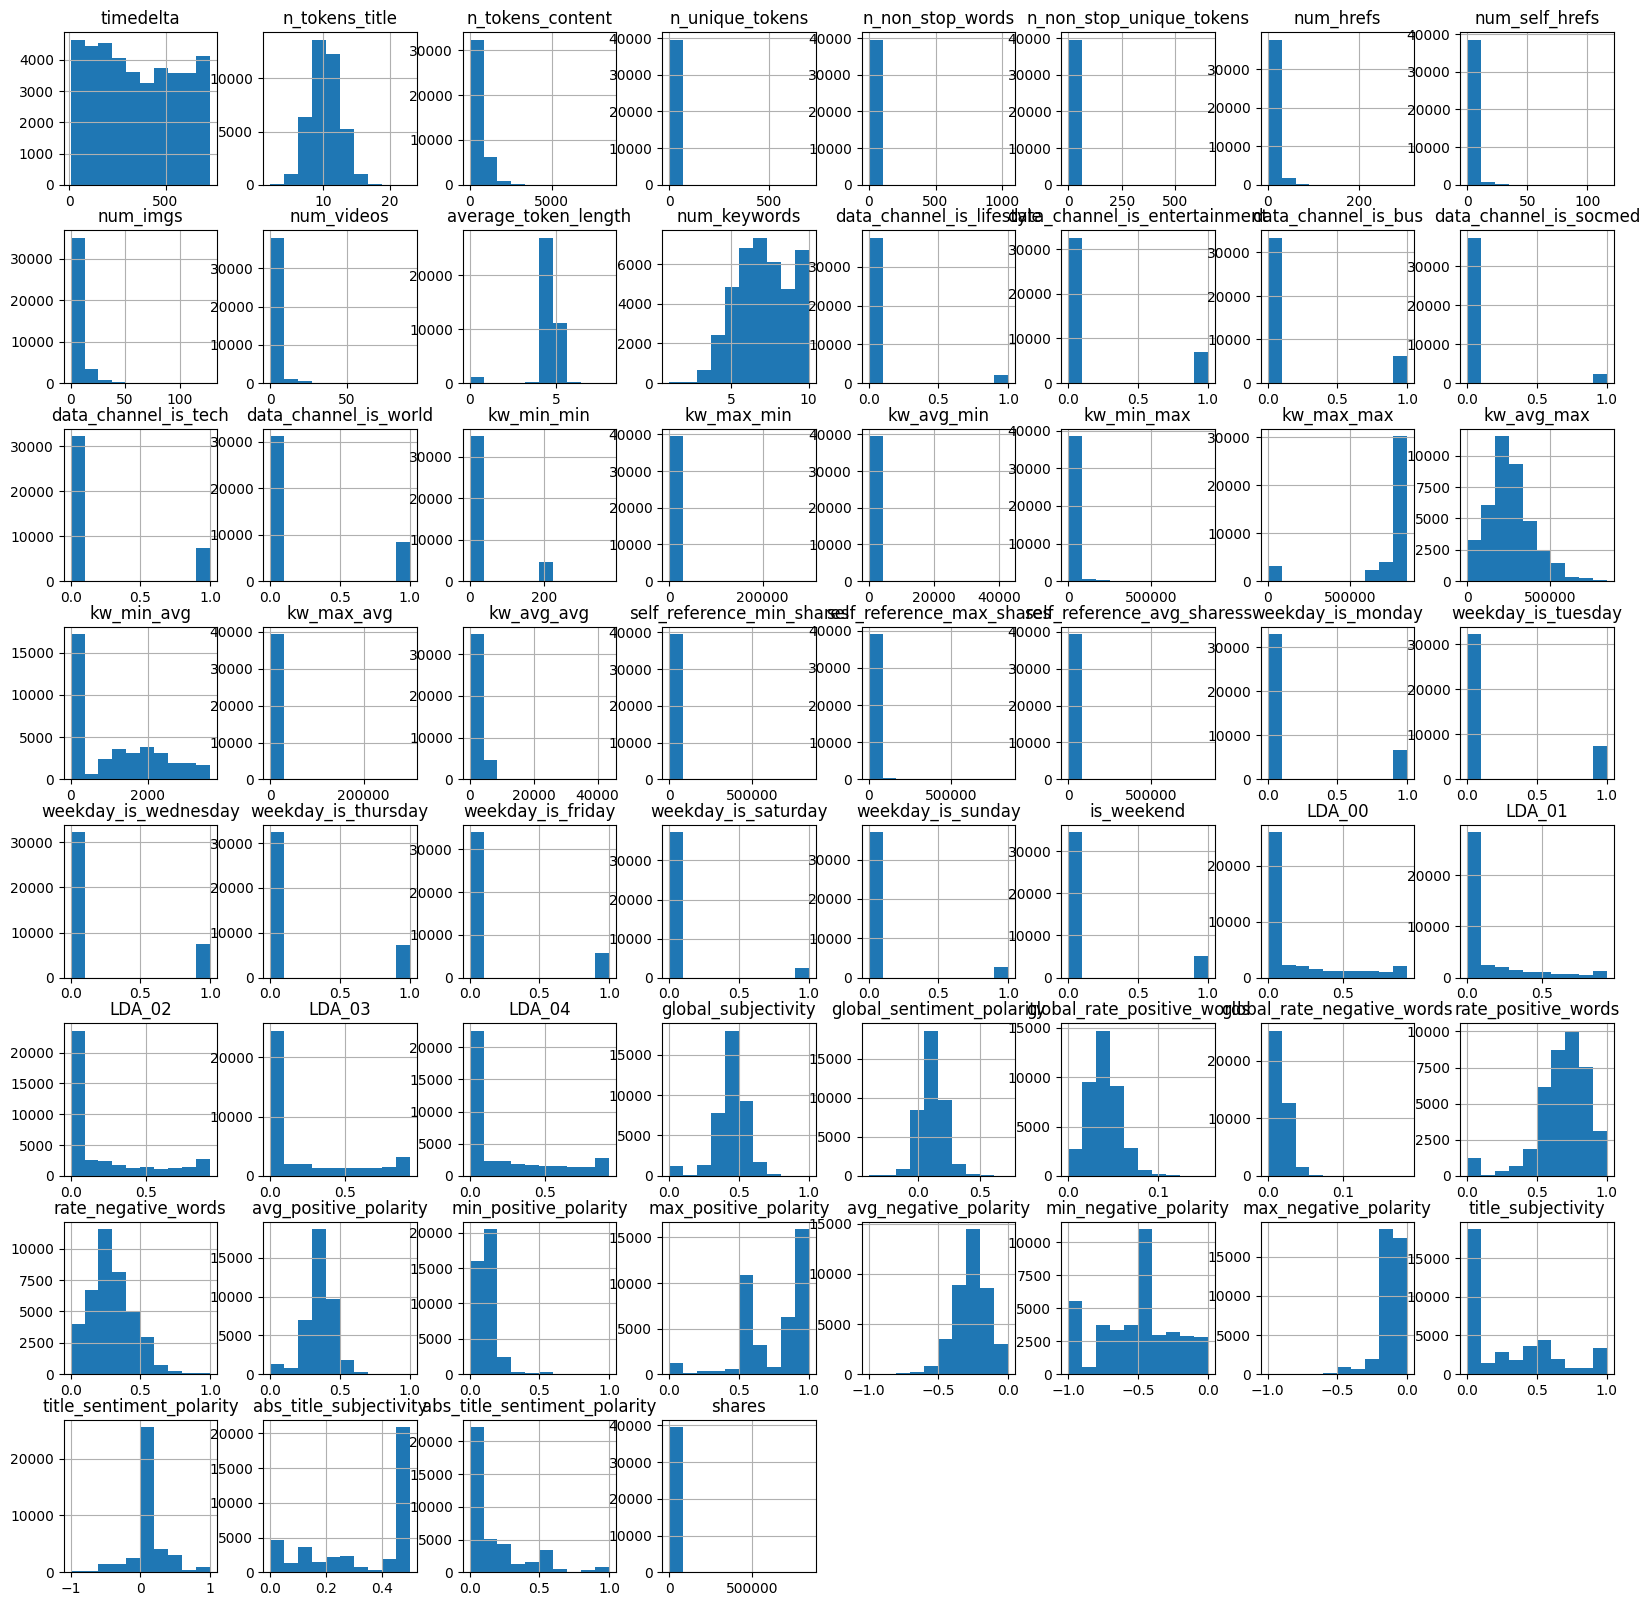

In [172]:
df.hist(figsize=(20,20))
plt.show()

In [9]:
# Feature Extraction from URL
def extract_url_features(url):
    parsed_url = urlparse(url)
    return pd.Series({
        'domain': parsed_url.netloc,
        'url_length': len(url),
        'num_subdirectories': url.count('/')
    })

df[['domain', 'url_length', 'num_subdirectories']] = df['url'].apply(extract_url_features)


In [10]:
# Web Scraping: Extract Title or Meta Description from URL (Optional & Time-Consuming)
def fetch_page_title(url):
    try:
        response = requests.get(url, timeout=5)
        soup = BeautifulSoup(response.text, 'html.parser')
        title = soup.title.string if soup.title else "No Title"
        return title
    except:
        return "Error"

# Feature Engineering 

In [9]:
import asyncio
import math
import csv
import aiohttp
from bs4 import BeautifulSoup
import pandas as pd

# Function to scrape a URL and extract meaningful content
async def scrape_url(url, session):
    """Fetch webpage content and extract meaningful text."""
    try:
        async with session.get(url) as response:
            html = await response.text()
            soup = BeautifulSoup(html, "html.parser")
            
            # Extract text from paragraph tags
            text = " ".join([p.get_text() for p in soup.find_all("p")])
            
            # Ensure text is not empty
            if not text.strip():
                text = "No meaningful content found."

            return {"url": url, "text": text}
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return {"url": url, "text": "Error retrieving content"}

# Function to process a batch of URLs asynchronously
async def process_batch(batch_urls, session):
    """Process a batch of URLs asynchronously."""
    tasks = [scrape_url(url, session) for url in batch_urls]
    return await asyncio.gather(*tasks)

# Function to write the scraped results to a CSV file
def write_to_csv(results, output_file):
    """Write scraped results to CSV."""
    with open(output_file, mode="a", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=["url", "text"])
        writer.writerows(results)

# Main function to handle batching and scraping
async def main(urls, batch_size=100, output_file="scraped_results_2.csv"):
    """Main function to handle batching and scraping."""
    total_urls = len(urls)
    print(f"Total URLs to process: {total_urls}")

    # Create new file and write header only if it doesn't exist
    with open(output_file, mode="w", newline="", encoding="utf-8") as file:
        writer = csv.DictWriter(file, fieldnames=["url", "text"])
        writer.writeheader()

    connector = aiohttp.TCPConnector(limit=10)
    async with aiohttp.ClientSession(connector=connector) as session:
        for i in range(0, total_urls, batch_size):
            batch_urls = urls[i : i + batch_size]
            print(f"Processing batch {i // batch_size + 1} of {math.ceil(total_urls / batch_size)}...")
            batch_results = await process_batch(batch_urls, session)
            batch_results = [result for result in batch_results if result is not None]
            write_to_csv(batch_results, output_file)
    
    print(f"All batches processed. Results saved in {output_file}.")

# If running in a Jupyter Notebook, directly use await instead of asyncio.run()
if __name__ == "__main__":
    # Load URLs from dataset
    df = pd.read_csv("OnlineNewsPopularity.csv")  # Replace with your actual CSV file
    urls = df['url'].tolist()

    # Use await directly for Jupyter Notebook or interactive environments
    await main(urls, batch_size=100, output_file="scraped_results_2.csv")


Total URLs to process: 39644
Processing batch 1 of 397...


C:\Users\joans\anaconda3\lib\site-packages\bs4\__init__.py:597: RuntimeWarning: coroutine 'main' was never awaited
  for i in current_data:


Processing batch 2 of 397...
Processing batch 3 of 397...
Processing batch 4 of 397...
Processing batch 5 of 397...
Processing batch 6 of 397...
Processing batch 7 of 397...
Processing batch 8 of 397...
Processing batch 9 of 397...
Processing batch 10 of 397...
Processing batch 11 of 397...
Processing batch 12 of 397...
Processing batch 13 of 397...
Processing batch 14 of 397...
Processing batch 15 of 397...
Processing batch 16 of 397...
Processing batch 17 of 397...
Processing batch 18 of 397...
Processing batch 19 of 397...
Processing batch 20 of 397...
Processing batch 21 of 397...
Processing batch 22 of 397...
Processing batch 23 of 397...
Processing batch 24 of 397...
Processing batch 25 of 397...
Processing batch 26 of 397...
Processing batch 27 of 397...
Processing batch 28 of 397...
Processing batch 29 of 397...
Processing batch 30 of 397...
Processing batch 31 of 397...
Processing batch 32 of 397...
Processing batch 33 of 397...
Processing batch 34 of 397...
Processing batch 3

In [ ]:
# create the df: 
# scraped_text_df = pd.read_csv("scraped_results_2.csv")

# Check for duplicates in the 'url' column
# duplicates = scraped_text_df[scraped_text_df.duplicated(subset='url')]
# print(f"Number of duplicate URLs: {duplicates.shape[0]}")

# Check for missing values in the dataframe
#missing_values = scraped_text_df.isnull().sum()
#print(f"Missing values per column:\n{missing_values}"

# Fill missing values
# scraped_text_df['text'].fillna('No meaningful content found', inplace=True)


In [ ]:
scraped_text_df = pd.read_csv("scraped_results_2.csv")

In [19]:
# Check for duplicates based on both 'url' and 'text' columns
duplicates = scraped_text_df[scraped_text_df.duplicated(subset=['url', 'text'])]
print(f"Number of duplicate entries (URL + Text): {duplicates.shape[0]}")

Number of duplicate entries (URL + Text): 0


In [23]:
# Check for missing values in the dataframe
missing_values = scraped_text_df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

Missing values per column:
url     0
text    0
dtype: int64


In [25]:
# Get number of unique URLs
unique_urls = scraped_text_df['url'].nunique()
print(f"Number of unique URLs: {unique_urls}")

# Get number of unique text entries
unique_text = scraped_text_df['text'].nunique()
print(f"Number of unique text entries: {unique_text}")

Number of unique URLs: 39644
Number of unique text entries: 39607


In [27]:
# Find duplicate URLs with different text entries
duplicate_urls = scraped_text_df[scraped_text_df.duplicated(subset='url', keep=False)]
print(f"Number of URLs with different texts: {duplicate_urls.shape[0]}")

# Group by URL and check how many unique texts are associated with each URL
url_text_groups = scraped_text_df.groupby('url')['text'].nunique()
urls_with_multiple_texts = url_text_groups[url_text_groups > 1]
print(f"URLs with multiple text entries: {urls_with_multiple_texts}")


Number of URLs with different texts: 0
URLs with multiple text entries: Series([], Name: text, dtype: int64)


In [29]:
# Check for text entries associated with more than one URL (if such case exists)
text_url_groups = scraped_text_df.groupby('text')['url'].nunique()
texts_with_multiple_urls = text_url_groups[text_url_groups > 1]
print(f"Texts associated with multiple URLs: {texts_with_multiple_urls}")

#--  "No meaningful content found = 36

Texts associated with multiple URLs: text
A 9-year-old girl accidentally shot and killed a shooting instructor with an automatic Uzi in White Hills, Arizona, authorities said in a statement Tuesday. The girl, who was unidentified, shot 39-year-old instructor Charles Vacca in the head on Monday, Mohave County Sherriff's deputies said in a release. She was learning how to use the weapon. The shooting took place around 10 a.m. local time at Last Stop, a business with a shooting range that's located in the ghost town. The girl, who police did not identify, was accompanied by her parents. A Fox 10 Phoenix YouTube video shows Vacca positioning the girl, who is wearing pink shorts and pink earmuffs, during part of the lesson before he was shot. The video cuts off before the fatal shot, though the gun appears to be lurching out of the girl's control.  When the girl pulled the Uzi's trigger, the recoil sent the gun over her head and shot Vacca, who was standing next to her, investigators determ

In [39]:
a = 39644
b = 39607
difference = a-b
print(difference)

37


In [41]:
# Merge DataFrames based on 'url'
merged_df = pd.merge(df, scraped_text_df, on='url', how='left')

In [43]:
merged_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,text
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Having trouble finding something to watch on A...
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,The Associated Press is the latest news organi...
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,It looks like 2012 was a pretty good year for ...
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,"When it comes to college football, NASA astron..."
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,LAS VEGAS -- Sharing photos and videos on your...


In [45]:
pip install textblob

In [47]:
from textblob import TextBlob

In [51]:
# Function to calculate polarity and subjectivity using TextBlob
def get_polarity_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

In [53]:
merged_df[['polarity', 'subjectivity']] = merged_df['text'].apply(lambda x: pd.Series(get_polarity_subjectivity(x)))

In [55]:
num_columns = merged_df.shape[1]
print(f"Number of columns: {num_columns}")
print("Column names:", merged_df.columns.tolist())

Number of columns: 64
Column names: ['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negati

In [59]:
# Check for missing values in the dataframe
missing_values = merged_df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

Missing values per column:
url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 abs_title_sentiment_polarity    0
 shares                          0
text                             0
polarity                         0
subjectivity                     0
Length: 64, dtype: int64


In [ ]:
Flesch-Kincaid Grade Level: Estimates the U.S. school grade level required to understand the text.
Gunning Fog Index: Indicates the years of formal education needed to comprehend the text on a first reading.
SMOG Index: Focuses on the number of complex words to assess readability.
These metrics can help determine if the complexity of the language affects article popularity.

In [61]:
pip install textstat


   ---------------------------------------- 0.0/105.3 kB ? eta -:--:--
   --- ------------------------------------ 10.2/105.3 kB ? eta -:--:--
   ----------- --------------------------- 30.7/105.3 kB 640.0 kB/s eta 0:00:01
   ------------------------------ -------- 81.9/105.3 kB 919.0 kB/s eta 0:00:01
   -------------------------------------- 105.3/105.3 kB 864.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/939.4 kB ? eta -:--:--
   --- ------------------------------------ 71.7/939.4 kB 3.8 MB/s eta 0:00:01
   ------- -------------------------------- 184.3/939.4 kB 2.8 MB/s eta 0:00:01
   ------------- -------------------------- 307.2/939.4 kB 2.7 MB/s eta 0:00:01
   ----------------- ---------------------- 399.4/939.4 kB 2.8 MB/s eta 0:00:01
   ------------------- -------------------- 460.8/939.4 kB 2.2 MB/s eta 0:00:01
   ----------------------------------- ---- 829.4/939.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 939.4/939.4 kB 3.1 MB/

In [63]:
import textstat

# Apply readability formulas
merged_df["flesch_kincaid"] = merged_df["text"].apply(textstat.flesch_kincaid_grade)
merged_df["gunning_fog"] = merged_df["text"].apply(textstat.gunning_fog)
merged_df["smog_index"] = merged_df["text"].apply(textstat.smog_index)

# Display summary statistics
print(merged_df[["flesch_kincaid", "gunning_fog", "smog_index"]].describe())


       flesch_kincaid   gunning_fog    smog_index
count    39644.000000  39644.000000  39644.000000
mean        10.365226     11.446184     12.181672
std          2.243287      2.169118      2.149192
min          0.500000      0.800000      0.000000
25%          8.900000     10.050000     11.100000
50%         10.300000     11.370000     12.200000
75%         11.700000     12.740000     13.400000
max         55.700000     54.760000     30.800000


In [65]:
merged_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,text,polarity,subjectivity,flesch_kincaid,gunning_fog,smog_index
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.187500,0.000000,0.187500,593,Having trouble finding something to watch on A...,0.092562,0.521617,12.2,13.61,14.2
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.000000,0.500000,0.000000,711,The Associated Press is the latest news organi...,0.148948,0.341246,11.9,14.29,14.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.000000,0.500000,0.000000,1500,It looks like 2012 was a pretty good year for ...,0.323333,0.702222,10.4,11.85,12.1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.000000,0.500000,0.000000,1200,"When it comes to college football, NASA astron...",0.110185,0.412422,8.1,9.63,10.1
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.136364,0.045455,0.136364,505,LAS VEGAS -- Sharing photos and videos on your...,0.190663,0.438122,9.5,11.22,12.7


In [ ]:
Named Entity Recognition (NER):

Entity Counts: Identify and count entities such as people, organizations, locations, dates, etc.
Specific Entities: Track mentions of trending personalities or events, as their presence might influence popularity.
NER can provide insights into the subjects covered in the article and their potential appeal.

In [69]:
pip install spacy textblob


  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
  Attempting uninstall: annotated-types
    Found existing installation: annotated-types 0.5.0
    Uninstalling annotated-types-0.5.0:
      Successfully uninstalled annotated-types-0.5.0


In [75]:
pip install vaderSentiment


   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 262.6 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/126.0 kB 365.7 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 672.7 kB/s eta 0:00:00


In [77]:
import spacy
import pandas as pd
import numpy as np
from textblob import TextBlob
from joblib import Parallel, delayed  # For parallel processing
from tqdm import tqdm  # Progress bar for large datasets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Save results
merged_df.to_csv("merged_data_with_ner_sentiment.csv", index=False)
print("NER-based sentiment features added successfully! ✅ (Energy-efficient mode)")

In [ ]:
print(merged_data[["NER_sentiment_polarity", "global_sentiment_polarity"]].corr())

In [ ]:
# Use of Multimedia: Presence of images, videos, or infographics within the text.
# Type-Token Ratio (TTR)
# Hapax Legomena (Unique words appearing once)
# Keep Keyword Density If SEO Impact is a Priority

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def extract_ner_counts(text):
    """
    Extracts named entity counts from the given text.

    Args:
        text (str): The input text.

    Returns:
        dict: A dictionary with entity labels as keys and their counts as values.
    """
    doc = nlp(text)
    entity_counts = {}
    for ent in doc.ents:
        if ent.label_ in entity_counts:
            entity_counts[ent.label_] += 1
        else:
            entity_counts[ent.label_] = 1
    return entity_counts


In [ ]:
import pandas as pd
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from joblib import Parallel, delayed

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Ensure 'text' column exists in merged_df
if 'text' not in merged_df.columns:
    raise ValueError("The DataFrame must contain a 'text' column.")

# Step 1: Extract NER counts
def process_ner(text):
    return extract_ner_counts(text)

tqdm.pandas(desc="Extracting NER counts")
merged_df['ner_counts'] = merged_df['text'].progress_apply(process_ner)

# Step 2: Perform sentiment analysis using VADER
def process_sentiment(text):
    return analyzer.polarity_scores(text)

tqdm.pandas(desc="Analyzing sentiment")
sentiment_scores = merged_df['text'].progress_apply(process_sentiment)
sentiment_df = pd.DataFrame(sentiment_scores.tolist())

# Concatenate sentiment DataFrame with the original DataFrame
merged_df = pd.concat([merged_df, sentiment_df], axis=1)

# Save the enriched DataFrame
merged_df.to_csv("merged_data_with_ner_sentiment.csv", index=False)
print("NER counts and sentiment features added successfully!")


In [17]:
import os
print(os.getcwd())  # This prints the current working directory

C:\Users\joans\Downloads


In [27]:
import os
print(os.path.exists("C:/Users/joans/Downloads/merged_df_1.csv"))

False


In [29]:
import pandas as pd
merged_df = pd.read_csv("C:/Users/joans/Downloads/merged_df_1.csv")  # Change this path

In [31]:
merged_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,shares,text,ner_counts,neg,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,593,Having trouble finding something to watch on A...,"{'ORG': 8, 'DATE': 3, 'WORK_OF_ART': 2, 'GPE':...",0.022,0.878,0.100,0.9224,12.2,13.61,14.2
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,711,The Associated Press is the latest news organi...,"{'ORG': 12, 'PERSON': 2, 'DATE': 3, 'GPE': 1, ...",0.000,0.947,0.053,0.9081,11.9,14.29,14.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1500,It looks like 2012 was a pretty good year for ...,"{'DATE': 9, 'ORG': 7, 'PERSON': 3, 'FAC': 1, '...",0.009,0.841,0.150,0.9827,10.4,11.85,12.1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,1200,"When it comes to college football, NASA astron...","{'ORG': 19, 'PERSON': 1, 'NORP': 6, 'FAC': 8, ...",0.005,0.838,0.157,0.9977,8.1,9.63,10.1
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,505,LAS VEGAS -- Sharing photos and videos on your...,"{'GPE': 2, 'ORG': 15, 'CARDINAL': 1, 'DATE': 2...",0.005,0.903,0.092,0.9697,9.5,11.22,12.7


In [33]:
import pandas as pd
from textblob import TextBlob
from joblib import Parallel, delayed

# Function to compute TTR using TextBlob (optimized for large datasets)
def compute_ttr_textblob(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0  # Return 0 if text is empty or non-string
    blob = TextBlob(text)
    words = [word.lower() for word in blob.words if word.isalpha()]  # Tokenize and filter non-alphabetic words
    unique_words = set(words)  # Get unique words
    return len(unique_words) / len(words) if len(words) > 0 else 0  # Compute TTR

# Option 1: Using Pandas apply (Efficient for smaller-medium datasets)
# merged_df["TTR"] = merged_df["article_text"].apply(compute_ttr_textblob)

# Option 2: Parallelizing the operation for large datasets
def parallel_ttr_calculation(texts):
    return Parallel(n_jobs=-1)(delayed(compute_ttr_textblob)(text) for text in texts)

# Replace 'your_text_column' with the actual column name from your dataset
text_column_name = 'text'  # Adjust this to the correct column name

# Apply in parallel for a large dataset
merged_df["TTR"] = pd.Series(parallel_ttr_calculation(merged_df[text_column_name]))

# Display the result to verify
print(merged_df[["TTR"]].head())


        TTR
0  0.661692
1  0.591667
2  0.578035
3  0.488889
4  0.536496


In [35]:
merged_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,text,ner_counts,neg,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index,TTR
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,Having trouble finding something to watch on A...,"{'ORG': 8, 'DATE': 3, 'WORK_OF_ART': 2, 'GPE':...",0.022,0.878,0.100,0.9224,12.2,13.61,14.2,0.661692
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,The Associated Press is the latest news organi...,"{'ORG': 12, 'PERSON': 2, 'DATE': 3, 'GPE': 1, ...",0.000,0.947,0.053,0.9081,11.9,14.29,14.0,0.591667
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,It looks like 2012 was a pretty good year for ...,"{'DATE': 9, 'ORG': 7, 'PERSON': 3, 'FAC': 1, '...",0.009,0.841,0.150,0.9827,10.4,11.85,12.1,0.578035
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,"When it comes to college football, NASA astron...","{'ORG': 19, 'PERSON': 1, 'NORP': 6, 'FAC': 8, ...",0.005,0.838,0.157,0.9977,8.1,9.63,10.1,0.488889
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,LAS VEGAS -- Sharing photos and videos on your...,"{'GPE': 2, 'ORG': 15, 'CARDINAL': 1, 'DATE': 2...",0.005,0.903,0.092,0.9697,9.5,11.22,12.7,0.536496


In [37]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
from joblib import Parallel, delayed
import nltk

# Download NLTK resources if not already downloaded
nltk.download('punkt')

# Function to compute Hapax Legomena efficiently
def compute_hapax(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0  # Return 0 if the text is empty or non-string
    # Tokenize using nltk
    words = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    words = [word for word in words if word.isalpha()]  # Filter out non-alphabetic words
    word_counts = Counter(words)  # Count the frequency of each word
    hapax_count = sum(1 for count in word_counts.values() if count == 1)  # Count hapax legomena
    return hapax_count / len(words) if len(words) > 0 else 0  # Calculate the ratio

# Function to apply parallel processing for large datasets
def parallel_hapax_calculation(texts):
    return Parallel(n_jobs=-1)(delayed(compute_hapax)(text) for text in texts)

# Example: Assuming the column containing text is 'your_text_column'
text_column_name = 'text'  # Adjust this to your actual text column name

# Apply in parallel for a large dataset
merged_df["Hapax_Ratio"] = pd.Series(parallel_hapax_calculation(merged_df[text_column_name]))

# Display the result to verify
print(merged_df[["Hapax_Ratio"]].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   Hapax_Ratio
0     0.527363
1     0.445833
2     0.433526
3     0.351893
4     0.368613


In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [43]:
merged_df.to_csv("merged_df.csv", index=False) 

In [53]:
# Identify text columns (you can manually list them if you know which ones)
text_columns = ['text']  # Replace with actual text column names

# Remove the text columns from the DataFrame
merged_df_2 = merged_df.drop(columns=text_columns)

# Add an index to the DataFrame
merged_df_2 = merged_df_2.reset_index(drop=False)  # This adds the default index

# Save the cleaned DataFrame to a new file
merged_df_2.to_csv('merged_df_2.csv', index=False)  # Saves it without the index column


In [51]:
merged_df_2.columns

Index(['index', 'url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' gl

In [69]:
import pandas as pd
from scipy.stats import shapiro, kstest

# List of variables to check for normality
variables = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 
             'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

for var in variables:
    # Ensure the variable is numeric, coercing errors into NaN
    merged_df_2[var] = pd.to_numeric(merged_df_2[var], errors='coerce')
    
    # Drop NaN values before testing for normality
    valid_data = merged_df_2[var].dropna()
    
    if valid_data.empty:
        print(f'{var} has no valid numeric data to test.')
        continue

    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(valid_data)  # Drop NaN values for the test
    print(f'{var}: Shapiro-Wilk Test statistic = {stat:.3f}, p-value = {p_value:.3f}')
    if p_value > 0.05:
        print(f"{var} is normally distributed (fail to reject H0)")
    else:
        print(f"The data for {var} does not follow a normal distribution (reject H0)")

    # Kolmogorov-Smirnov test for normality (alternative)
    stat, p_value_ks = kstest(valid_data, 'norm')
    print(f'{var}: K-S Test statistic = {stat:.3f}, p-value = {p_value_ks:.3f}')
    if p_value_ks > 0.05:
        print(f"{var} is normally distributed (fail to reject H0)")
    else:
        print(f"The data for {var} does not follow a normal distribution (reject H0)")


C:\Users\joans\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


neg: Shapiro-Wilk Test statistic = 0.863, p-value = 0.000
The data for neg does not follow a normal distribution (reject H0)
neg: K-S Test statistic = 0.500, p-value = 0.000
The data for neg does not follow a normal distribution (reject H0)
neu: Shapiro-Wilk Test statistic = 0.977, p-value = 0.000
The data for neu does not follow a normal distribution (reject H0)
neu: K-S Test statistic = 0.736, p-value = 0.000
The data for neu does not follow a normal distribution (reject H0)
pos: Shapiro-Wilk Test statistic = 0.955, p-value = 0.000
The data for pos does not follow a normal distribution (reject H0)
pos: K-S Test statistic = 0.500, p-value = 0.000
The data for pos does not follow a normal distribution (reject H0)
compound: Shapiro-Wilk Test statistic = 0.645, p-value = 0.000
The data for compound does not follow a normal distribution (reject H0)
compound: K-S Test statistic = 0.469, p-value = 0.000
The data for compound does not follow a normal distribution (reject H0)
flesch_kincaid: 

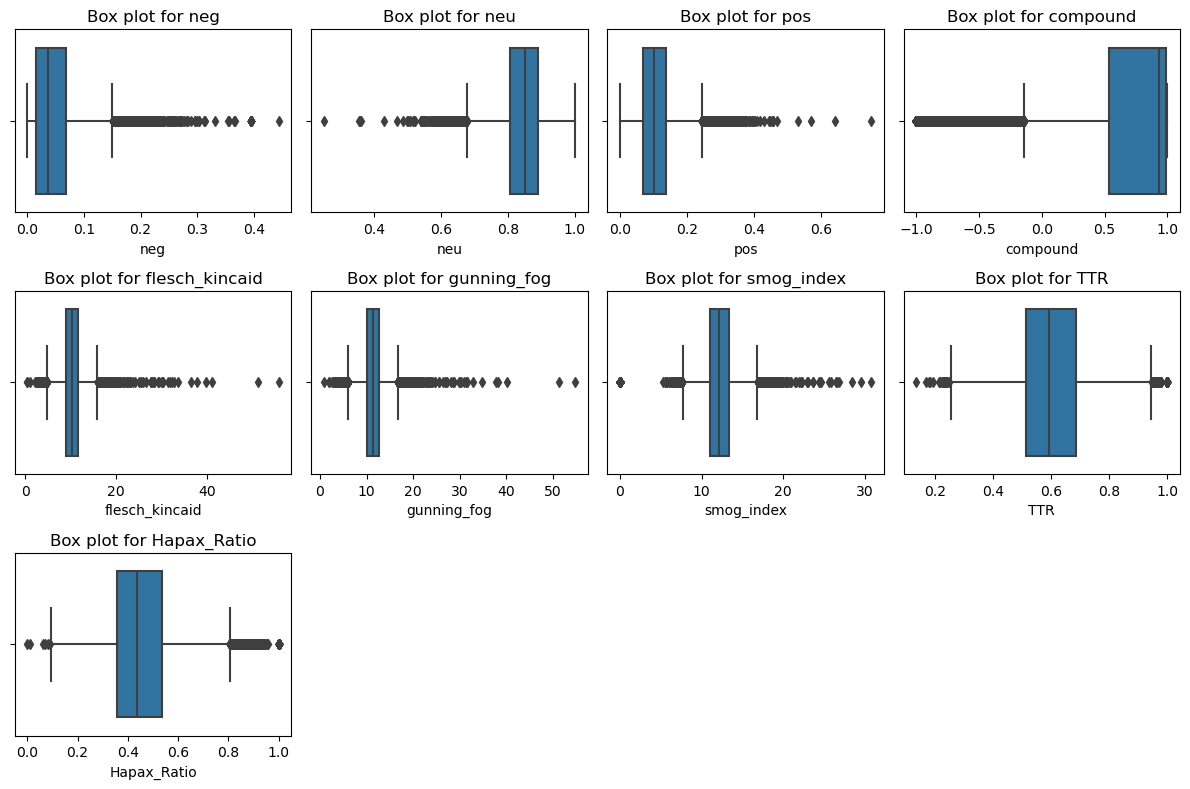

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to check
variables = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 
             'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create box plots for each variable
for i, var in enumerate(variables, 1):
    plt.subplot(3, 4, i)  # Arrange the box plots in a grid (3 rows, 4 columns)
    sns.boxplot(x=merged_df[var].dropna())  # Drop NaN values before plotting
    plt.title(f'Box plot for {var}')
    plt.tight_layout()

plt.show()


In [79]:
import pandas as pd
from scipy.stats import skew

# List of variables to check for skewness
variables = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 
             'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Calculate and print skewness for each variable
for var in variables:
    # Drop NaN values to avoid issues
    data = merged_df[var].dropna()
    
    # Calculate skewness
    skewness_value = skew(data)
    print(f'{var}: Skewness = {skewness_value:.3f}')


neg: Skewness = 1.712
neu: Skewness = -0.678
pos: Skewness = 0.988
compound: Skewness = -1.498
flesch_kincaid: Skewness = 1.116
gunning_fog: Skewness = 1.019
smog_index: Skewness = -1.426
TTR: Skewness = 0.294
Hapax_Ratio: Skewness = 0.685


In [81]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# List of positively skewed variables (based on your skewness values)
positively_skewed = ['neg', 'pos', 'flesch_kincaid', 'gunning_fog']

# List of negatively skewed variables (based on your skewness values)
negatively_skewed = ['neu', 'compound', 'smog_index']

# Efficient Log Transformation for positively skewed variables (vectorized)
for var in positively_skewed:
    merged_df_2[var] = np.log(merged_df[var] + 1)  # Vectorized log transformation
print("Log transformation applied to positively skewed variables.")

# Efficient Square Root Transformation for negatively skewed variables (vectorized)
for var in negatively_skewed:
    merged_df_2[var] = np.sqrt(merged_df[var] - merged_df[var].min() + 1)  # Vectorized square root transformation
print("Square root transformation applied to negatively skewed variables.")

# Alternatively, if cube root transformation is preferred:
# for var in negatively_skewed:
#     merged_df[var] = np.cbrt(mergbed_df[var])  # Vectorized cube root transformation

# Apply Yeo-Johnson transformation to all relevant variables (flexible for both negative and positive skewness)
transformer = PowerTransformer(method='yeo-johnson')

merged_df_2[['neg', 'pos', 'flesch_kincaid', 'gunning_fog', 'neu', 'compound', 'smog_index']] = \
    transformer.fit_transform(merged_df[['neg', 'pos', 'flesch_kincaid', 'gunning_fog', 'neu', 'compound', 'smog_index']])
print("Yeo-Johnson transformation applied to all relevant variables.")


Log transformation applied to positively skewed variables.
Square root transformation applied to negatively skewed variables.
Yeo-Johnson transformation applied to all relevant variables.


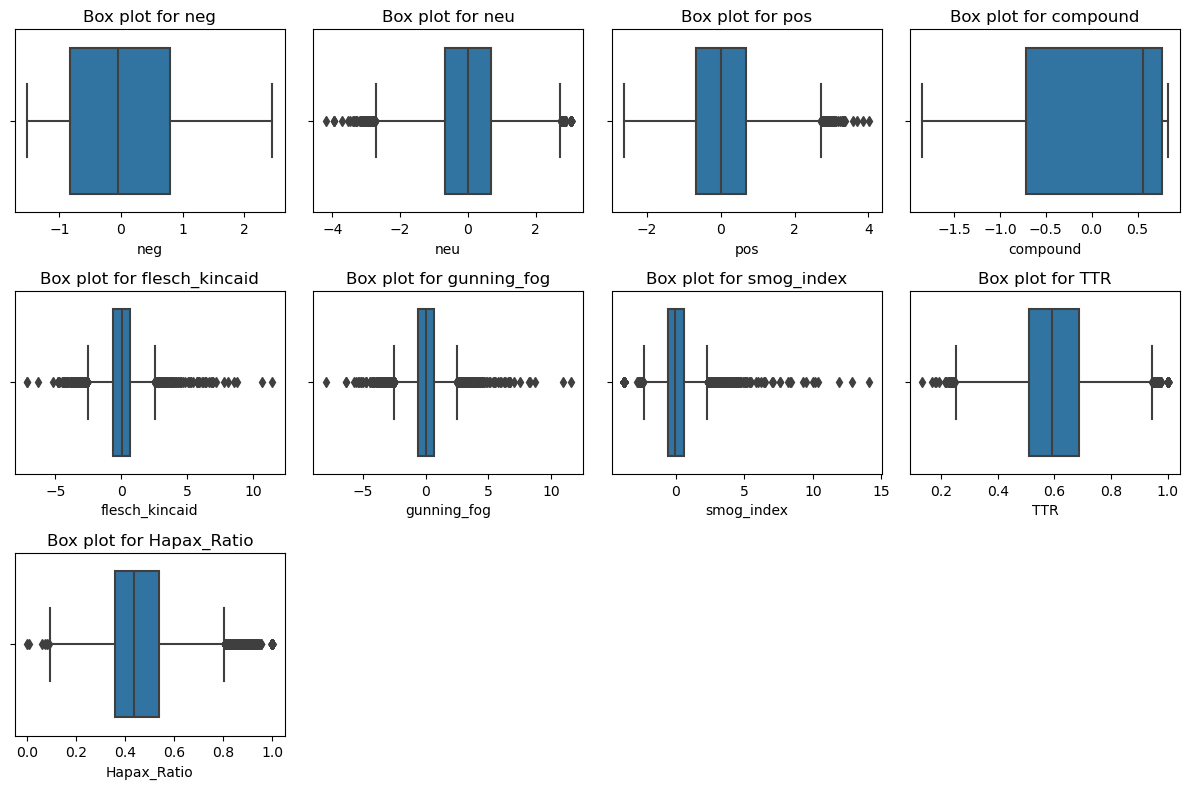

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to check
variables = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 
             'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create box plots for each variable
for i, var in enumerate(variables, 1):
    plt.subplot(3, 4, i)  # Arrange the box plots in a grid (3 rows, 4 columns)
    sns.boxplot(x=merged_df_2[var].dropna())  # Drop NaN values before plotting
    plt.title(f'Box plot for {var}')
    plt.tight_layout()

plt.show()


In [ ]:
# Highly skewed still:  flesch_kincaid, gunning_fod, smog_index

In [109]:
from scipy.stats import spearmanr

# List of independent variables to check for correlation
independent_vars = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Creating an empty dictionary to store results
correlation_results = {}

# Iterate through each pair of independent variables to compute Spearman correlation
for var1 in independent_vars:
    for var2 in independent_vars:
        if var1 != var2:  # Skip self-correlation
            corr, p_value = spearmanr(merged_df_2[var1], merged_df_2[var2])
            correlation_results[(var1, var2)] = {'correlation': corr, 'p_value': p_value}

# Display the correlation results
for pair, result in correlation_results.items():
    print(f"Spearman correlation between {pair[0]} and {pair[1]}: Correlation = {result['correlation']:.4f}, p-value = {result['p_value']:.4f}")


Spearman correlation between neg and neu: Correlation = -0.5120, p-value = 0.0000
Spearman correlation between neg and pos: Correlation = -0.1337, p-value = 0.0000
Spearman correlation between neg and compound: Correlation = -0.4637, p-value = 0.0000
Spearman correlation between neg and flesch_kincaid: Correlation = 0.0060, p-value = 0.2333
Spearman correlation between neg and gunning_fog: Correlation = 0.0099, p-value = 0.0487
Spearman correlation between neg and smog_index: Correlation = 0.0254, p-value = 0.0000
Spearman correlation between neg and TTR: Correlation = -0.0792, p-value = 0.0000
Spearman correlation between neg and Hapax_Ratio: Correlation = -0.0674, p-value = 0.0000
Spearman correlation between neu and neg: Correlation = -0.5120, p-value = 0.0000
Spearman correlation between neu and pos: Correlation = -0.7157, p-value = 0.0000
Spearman correlation between neu and compound: Correlation = -0.1746, p-value = 0.0000
Spearman correlation between neu and flesch_kincaid: Corr

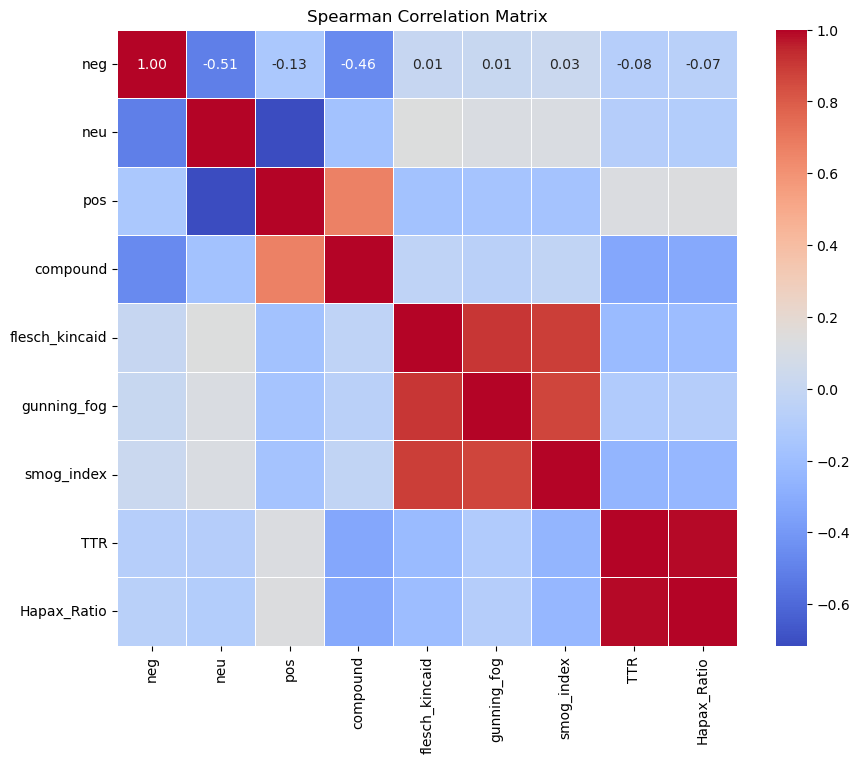

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# List of independent variables to check for correlation
independent_vars = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Calculate the Spearman correlation matrix for all independent variables
corr_matrix, _ = spearmanr(merged_df_2[independent_vars])

# Convert the correlation matrix into a DataFrame for better readability
corr_df = pd.DataFrame(corr_matrix, index=independent_vars, columns=independent_vars)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Spearman Correlation Matrix")
plt.show()


In [103]:
# Check for missing values
print(merged_df_2[independent_vars].isna().sum())
print(merged_df_2[independent_vars].dtypes)

neg               0
neu               0
pos               0
compound          0
flesch_kincaid    0
gunning_fog       0
smog_index        0
TTR               0
Hapax_Ratio       0
dtype: int64
neg               float64
neu               float64
pos               float64
compound          float64
flesch_kincaid    float64
gunning_fog       float64
smog_index        float64
TTR               float64
Hapax_Ratio       float64
dtype: object


In [105]:
# Calculate the Spearman correlation matrix
corr_matrix, _ = spearmanr(merged_df_2[independent_vars])

# Check the correlation matrix for NaN or invalid values
print(corr_matrix)


[[ 1.         -0.51204379 -0.13371409 -0.4636547   0.00598574  0.00989999
   0.02537097 -0.07917678 -0.06739769]
 [-0.51204379  1.         -0.7156511  -0.17455625  0.13941265  0.12187809
   0.12151819 -0.08727478 -0.09898263]
 [-0.13371409 -0.7156511   1.          0.66505575 -0.17860249 -0.1606324
  -0.16934034  0.12403008  0.13123425]
 [-0.4636547  -0.17455625  0.66505575  1.         -0.03686182 -0.06478359
  -0.02265363 -0.33171691 -0.31578815]
 [ 0.00598574  0.13941265 -0.17860249 -0.03686182  1.          0.90647924
   0.88786907 -0.22124913 -0.20700886]
 [ 0.00989999  0.12187809 -0.1606324  -0.06478359  0.90647924  1.
   0.8678876  -0.10687725 -0.08734518]
 [ 0.02537097  0.12151819 -0.16934034 -0.02265363  0.88786907  0.8678876
   1.         -0.25623577 -0.24249776]
 [-0.07917678 -0.08727478  0.12403008 -0.33171691 -0.22124913 -0.10687725
  -0.25623577  1.          0.98712865]
 [-0.06739769 -0.09898263  0.13123425 -0.31578815 -0.20700886 -0.08734518
  -0.24249776  0.98712865  1.   

In [95]:
# Convert the correlation matrix into a DataFrame for better readability
corr_df = pd.DataFrame(corr_matrix, index=independent_vars, columns=independent_vars)

# Display the summary statistics for the correlation matrix
print(f"Mean correlation: {corr_df.mean().mean():.4f}")
print(f"Standard deviation of correlation: {corr_df.stack().std():.4f}")

# Find the highest and lowest correlations (excluding the diagonal)
upper_triangle = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(bool))
highest_corr = upper_triangle.stack().idxmax(), upper_triangle.max().round(4)
lowest_corr = upper_triangle.stack().idxmin(), upper_triangle.min().round(4)

print(f"Highest correlation: {highest_corr[0]} with correlation = {highest_corr[1]}")
print(f"Lowest correlation: {lowest_corr[0]} with correlation = {lowest_corr[1]}")


Mean correlation: 0.1175
Standard deviation of correlation: 0.4849
Highest correlation: ('TTR', 'Hapax_Ratio') with correlation = neg                  NaN
neu              -0.5120
pos              -0.1337
compound          0.6651
flesch_kincaid    0.1394
gunning_fog       0.9065
smog_index        0.8879
TTR               0.1240
Hapax_Ratio       0.9871
dtype: float64
Lowest correlation: ('neu', 'pos') with correlation = neg                  NaN
neu              -0.5120
pos              -0.7157
compound         -0.4637
flesch_kincaid   -0.1786
gunning_fog      -0.1606
smog_index       -0.1693
TTR              -0.3317
Hapax_Ratio      -0.3158
dtype: float64


In [113]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming merged_df_cleaned contains your transformed independent variables
# Select the independent variables you want to calculate VIF for
independent_vars = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Add a constant column to the data (for the intercept term in the regression)
X = merged_df_2[independent_vars]
X = add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


         Variable        VIF
0           const  94.938859
1             neg   7.952552
2             neu  19.421658
3             pos  18.461198
4        compound   3.877486
5  flesch_kincaid   7.350936
6     gunning_fog   6.697913
7      smog_index   3.770019
8             TTR  34.136676
9     Hapax_Ratio  34.239846


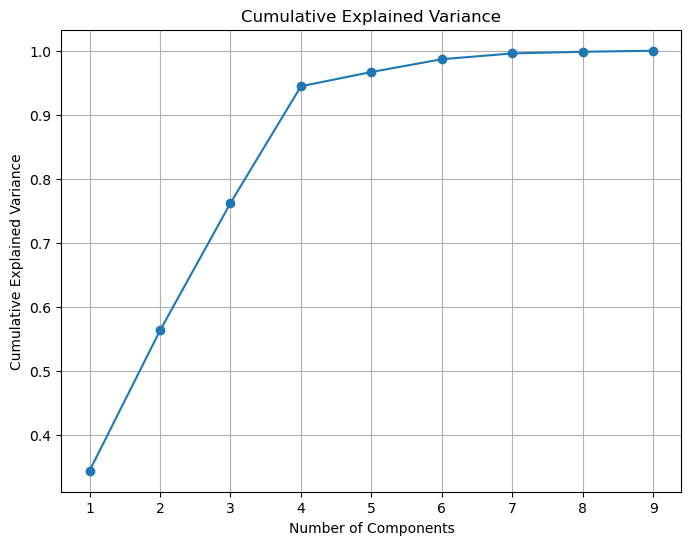

        PC1       PC2       PC3
0  1.119396 -0.173297  0.892987
1  2.018143  0.030754 -0.794043
2 -0.065220 -1.417400  0.070926
3 -1.185647 -1.905671 -1.366622
4  0.458325 -0.939176 -1.339309


In [115]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming merged_df_cleaned is your dataframe containing the transformed independent variables
independent_vars = ['neg', 'neu', 'pos', 'compound', 'flesch_kincaid', 'gunning_fog', 'smog_index', 'TTR', 'Hapax_Ratio']

# Step 1: Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(merged_df_2[independent_vars])

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Explained variance ratio (how much variance each component explains)
explained_variance = pca.explained_variance_ratio_

# Step 4: Plot the cumulative explained variance to decide how many components to keep
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Step 5: Select the number of components (e.g., retain components that explain 80% of variance)
n_components = 3  # Example: keep 3 components (this can vary based on your cumulative plot)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Step 6: View the principal components (new transformed dataset)
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
print(pca_df.head())


In [127]:
pca_df.head()
pca_df.tail()

,PC1,PC2,PC3
39639,2.637838,-0.006340,0.712630
39640,-1.497429,-0.527890,-1.394540
39641,-1.798598,-0.634147,0.375965
39642,2.399581,1.974940,0.135579
39643,-1.338961,-0.510878,2.726517


In [129]:
# Print the explained variance ratio for each principal component
print(pca.explained_variance_ratio_)


[0.3445691  0.21887288 0.19885398]


In [131]:
# Cumulative explained variance
print(pca.explained_variance_ratio_.cumsum())


[0.3445691  0.56344198 0.76229596]


In [137]:
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           39644 non-null  int64  
 1   url                             39644 non-null  object 
 2    timedelta                      39644 non-null  float64
 3    n_tokens_title                 39644 non-null  float64
 4    n_tokens_content               39644 non-null  float64
 5    n_unique_tokens                39644 non-null  float64
 6    n_non_stop_words               39644 non-null  float64
 7    n_non_stop_unique_tokens       39644 non-null  float64
 8    num_hrefs                      39644 non-null  float64
 9    num_self_hrefs                 39644 non-null  float64
 10   num_imgs                       39644 non-null  float64
 11   num_videos                     39644 non-null  float64
 12   average_token_length           

In [145]:
from scipy.stats import spearmanr

# Initialize dictionary to store Spearman correlation results
spearman_results = {}

# Loop through all columns, but calculate Spearman correlation with 'shares' for each column
for col in merged_df_2.columns:
    if col != 'shares':  # Avoid calculating the correlation for 'shares' with itself
        corr, p_value = spearmanr(merged_df_2['shares'], merged_df_2[col])
        spearman_results[col] = (corr, p_value)

# Print the results
for var, (corr, p_value) in spearman_results.items():
    print(f"{var}: Spearman Correlation = {corr}, p-value = {p_value}")

#---  These are the significant variables from the Features from text content
#  ner_counts: Spearman Correlation = -0.01294152285159872, p-value = 0.009972322979918754
#  flesch_kincaid: Spearman Correlation = -0.015382589972575187, p-value = 0.0021921683556670054
#  gunning_fog: Spearman Correlation = -0.012420203259060798, p-value = 0.013399187890655207
# smog_index: Spearman Correlation = -0.013397421891061865, p-value = 0.00764020578124211

index: Spearman Correlation = -0.03206922544918986, p-value = 1.6952483908643252e-10
url: Spearman Correlation = -0.03206922544918986, p-value = 1.6952483908643252e-10
timedelta: Spearman Correlation = 0.032019179017579495, p-value = 1.8093388390418334e-10
n_tokens_title: Spearman Correlation = -0.040278201936068875, p-value = 1.0343295004259011e-15
n_tokens_content: Spearman Correlation = 0.009675150963278633, p-value = 0.054056393263260186
n_unique_tokens: Spearman Correlation = -0.04484214621000632, p-value = 4.1595345352510483e-19
n_non_stop_words: Spearman Correlation = 0.009646258574607174, p-value = 0.0547781838698799
n_non_stop_unique_tokens: Spearman Correlation = -0.07070573858757861, p-value = 4.060485839353601e-45
num_hrefs: Spearman Correlation = 0.09001508876856178, p-value = 4.1085992341948324e-72
num_self_hrefs: Spearman Correlation = 0.03750254041793133, p-value = 8.053180276642567e-14
num_imgs: Spearman Correlation = 0.0831142953944779, p-value = 1.0239849318543847e-6

In [143]:
# Strip any leading/trailing spaces from column names
merged_df_2.columns = merged_df_2.columns.str.strip()

# Check the columns again
print(merged_df_2.columns)


Index(['index', 'url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_word

In [174]:
import pandas as pd
df2 = pd.read_csv("merged_df_2.csv")

In [175]:
df2.head()

,index,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,ner_counts,neg,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index,TTR,Hapax_Ratio
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,...,"{'ORG': 8, 'DATE': 3, 'WORK_OF_ART': 2, 'GPE':...",-0.541350,0.470178,-0.019750,0.497976,0.848267,1.010549,1.010189,0.661692,0.527363
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,...,"{'ORG': 12, 'PERSON': 2, 'DATE': 3, 'GPE': 1, ...",-1.521802,1.812844,-1.070012,0.440432,0.724251,1.291959,0.897768,0.591667,0.445833
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,...,"{'DATE': 9, 'ORG': 7, 'PERSON': 3, 'FAC': 1, '...",-1.084649,-0.144783,0.846919,0.752670,0.075881,0.241063,-0.112047,0.578035,0.433526
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,...,"{'ORG': 19, 'PERSON': 1, 'NORP': 6, 'FAC': 8, ...",-1.272251,-0.191707,0.951621,0.819121,-1.029631,-0.832408,-1.058647,0.488889,0.351893
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,...,"{'GPE': 2, 'ORG': 15, 'CARDINAL': 1, 'DATE': 2...",-1.272251,0.925713,-0.180452,0.696088,-0.338715,-0.050675,0.195376,0.536496,0.368613


In [176]:
#Removing Space Character from Feature names
df2.columns = df2.columns.str.replace(' ', '')

In [177]:
df2.columns

Index(['index', 'url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_word

In [178]:
# Here we drop the two non-preditive (url and timedelta) attributes. They won't contribute anything
df.drop(labels=['url','timedelta'], axis = 1, inplace=True)
df.head(n=4)
# remove noise from n_tokens_content. those equals to 0
num_of_nowords=df[df['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)
df  = df[df['n_tokens_content'] != 0]
# Comment - Visualizing the n_non_stop_words data field shows that the present of a record with 1042 value, 
# futher observation of that data shows that it belongs to entertainment which is not actually. It belongs to world news or others.
# this particluar also contains 0 on a lot of attributes. This record is classifed as a noise and will be remove.
df = df[df['n_non_stop_words'] != 1042]
# Here, we will go ahead and drop the field of ' n_non_stop_words. It doesn't contain relaible information.
df.drop(labels=['n_non_stop_words'], axis = 1, inplace=True)

number of news items with no words 1181


In [ ]:
# column59 = df.iloc[:,58]

# df = df.drop(df.columns[58], axis=1)

# df['shares'] = column59 

In [179]:
share_data = np.sort(df['shares'].values)
print(share_data.shape)
leng = share_data.shape[0]

middle = share_data[int(leng*0.7)-1]
middle

(38462,)


np.int64(2300)

In [181]:
# ver good shares
'''
share_data = np.sort(data[' shares'].values)

leng = share_data.shape[0]

top_70 = share_data[int(leng*0.80)-1]
print (top_70)
top_50 = share_data[int(leng*0.40)-1]
print (top_50)
#temp_data = data[(data[' shares'] >= top_70)]
temp_data = data[(data[' shares'] >= top_50) & (data[' shares'] < top_70)]

print(temp_data.shape)

'''

"\nshare_data = np.sort(data[' shares'].values)\n\nleng = share_data.shape[0]\n\ntop_70 = share_data[int(leng*0.80)-1]\nprint (top_70)\ntop_50 = share_data[int(leng*0.40)-1]\nprint (top_50)\n#temp_data = data[(data[' shares'] >= top_70)]\ntemp_data = data[(data[' shares'] >= top_50) & (data[' shares'] < top_70)]\n\nprint(temp_data.shape)\n\n"

### Create the Shares label
Two labels will be considered: Popular and Unpopular. Popular are shares above the median while unpopular are shares from median downwards

In [198]:
# create label grades for the classes
'''
Very good = 7746 # top 80%
Good = 7785 # top 60 - top 80
Average = 8585 # 40% - 60%
Poor = 14346 # less than 40%
'''
share_label = list()
for share in df['shares']:
    if share <= 1400:
        share_label.append('Unpopular')
    else:
        share_label.append('Popular')

# Update this class label into the dataframe
df = pd.concat([df.reset_index(drop=True), pd.DataFrame(share_label, columns=['popularity'])], axis=1)
df.head(4)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity,popularity
0,2.484907,5.389072,-0.410084,-0.204095,4.0,2.0,1.0,0.0,1.543376,1.609438,...,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,6.385194,Unpopular,Unpopular
1,2.197225,5.541264,-0.502952,-0.233262,3.0,1.0,1.0,0.0,1.592032,1.386294,...,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,6.566672,Unpopular,Unpopular
2,2.197225,5.351858,-0.553160,-0.409676,3.0,1.0,1.0,0.0,1.480095,1.791759,...,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,7.313220,Popular,Unpopular
3,2.197225,6.274762,-0.685600,-0.407014,9.0,0.0,1.0,0.0,1.482717,1.945910,...,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,7.090077,Unpopular,Unpopular


In [199]:
# Evaluating features (sensors) contribution towards the label
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='popularity',data=df,alpha=0.5)

data_channel_data = df.groupby('popularity').size().reset_index()
data_channel_data.columns = ['popularity','No of articles']
data_channel_data

ValueError: If using all scalar values, you must pass an index

<Figure size 1500x500 with 0 Axes>

In [184]:
# Understanding target variable distribution
df['shares'].describe()

count     38462.000000
mean       3355.294238
std       11586.112129
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [185]:
df['shares'].median()

np.float64(1400.0)

## Data Transformation - Log Transform
The given data doesn't have a normal distribution. A log transformation will be carried out to transform the full data to have a normal distribution as close as possible

Skewness: 34.952465
Kurtosis: 1909.931080


C:\Users\sebas\AppData\Local\Temp\ipykernel_21304\173683749.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['shares'], fit=norm);


"\n'Shares' doesn't have a normal distribution. It shows 'peakedness', positive skewness and does not follow the diagonal line.\nThus some statistic analysis might not be suitable for it\n"

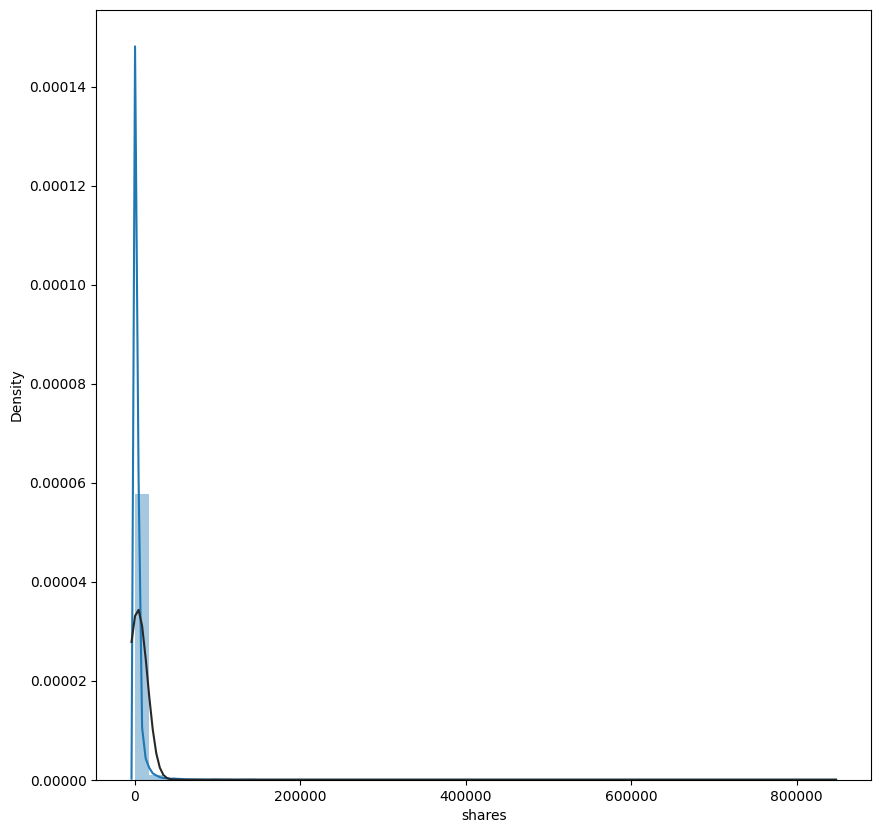

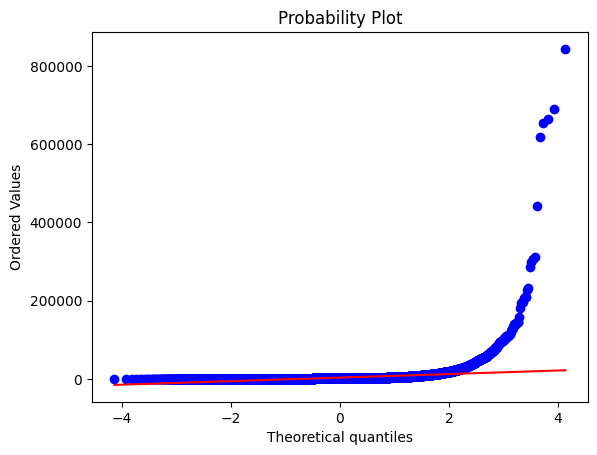

In [186]:
print("Skewness: %f" % df['shares'].skew())
print("Kurtosis: %f" % df['shares'].kurt())

from scipy.stats import norm, probplot

#histogram and normal probability plot
temp_data = df[df['shares'] <= 100000]
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(df['shares'], fit=norm);
fig = plt.figure()
res = probplot(df['shares'], plot=plt)
'''
'Shares' doesn't have a normal distribution. It shows 'peakedness', positive skewness and does not follow the diagonal line.
Thus some statistic analysis might not be suitable for it
'''

Although shares doesn't have a normal distrubition, we can do a log transformation to give us a normal distrubition data

C:\Users\sebas\AppData\Local\Temp\ipykernel_21304\1253781721.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6.3851944  6.56667243 7.31322039 ... 7.54960917 7.00306546 7.17011954]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_shares_data.loc[new_shares_data['shares'] > 0, 'shares'] = np.log(df.loc[df['shares'] > 0, 'shares'])
C:\Users\sebas\AppData\Local\Temp\ipykernel_21304\1253781721.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_shares_log, fit=norm);


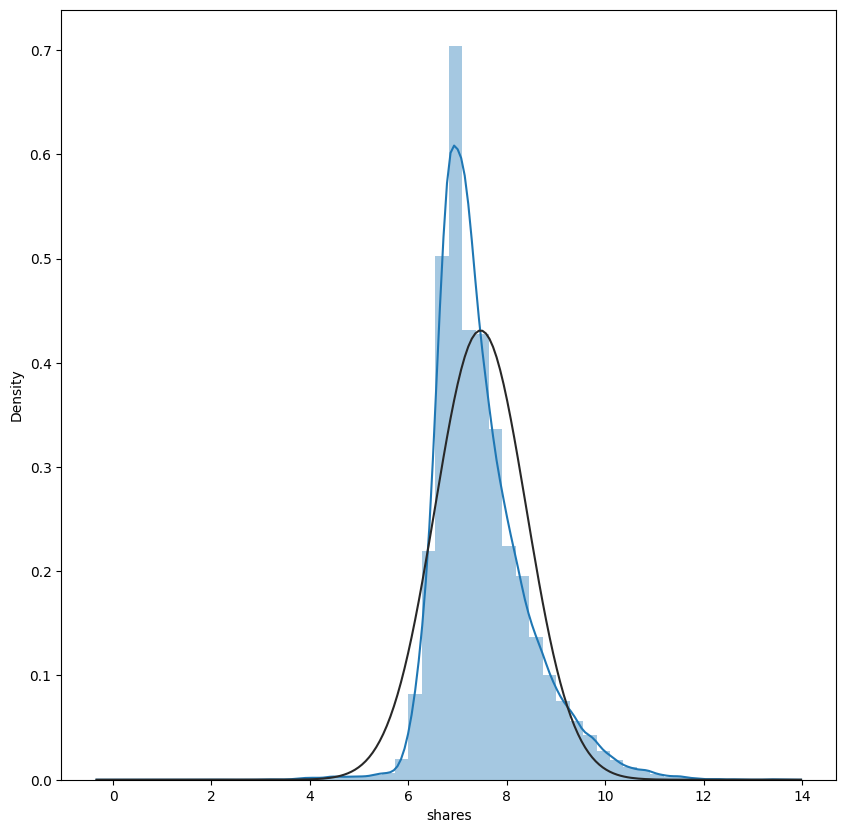

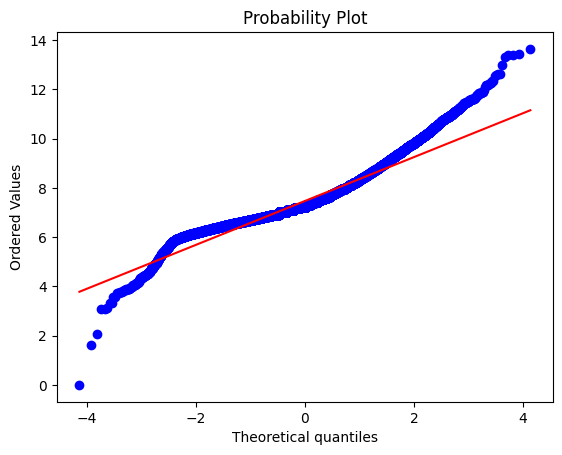

In [187]:
#applying log transformation
new_shares_data = copy(df)

new_shares_data.loc[new_shares_data['shares'] > 0, 'shares'] = np.log(df.loc[df['shares'] > 0, 'shares'])
new_shares_log = new_shares_data['shares']
#transformed histogram and normal probability plot
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(new_shares_log, fit=norm);
fig = plt.figure()
res = probplot(new_shares_log, plot=plt)

#### Finding the normal distribution of the dataset

Transforming the whole position data to a normal distribution

In [188]:
df.shape

(38462, 59)

In [189]:
df.columns.get_loc('popularity')

58

In [190]:
df.select_dtypes(include=['object', 'category'])

,popularity
0,Unpopular
1,Unpopular
2,Popular
3,Unpopular
4,Unpopular
...,...
38457,Popular
38458,Popular
38459,Popular
38460,Unpopular


In [35]:
df.columns.get_loc('shares')

58

In [191]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,...,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000
mean,10.382455,563.269201,0.546837,0.693455,11.217877,3.394597,4.561853,1.263819,4.687892,7.215017,...,0.098379,0.779983,-0.267500,-0.537984,-0.110804,0.280581,0.070999,0.342440,0.154934,3355.294238
std,2.113816,468.277491,0.102314,0.100644,11.340728,3.869676,8.292093,4.164945,0.283234,1.916484,...,0.070381,0.212474,0.121168,0.279693,0.094918,0.323562,0.264341,0.188600,0.225637,11586.112129
min,2.000000,18.000000,0.114964,0.119134,0.000000,0.000000,0.000000,0.000000,3.600000,1.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,259.000000,0.477419,0.632588,5.000000,1.000000,1.000000,0.000000,4.496245,6.000000,...,0.050000,0.600000,-0.331540,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000
50%,10.000000,423.000000,0.542982,0.693727,8.000000,3.000000,1.000000,0.000000,4.674120,7.000000,...,0.100000,0.800000,-0.257738,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,729.000000,0.611111,0.756944,14.000000,4.000000,4.000000,1.000000,4.861903,9.000000,...,0.100000,1.000000,-0.193423,-0.312500,-0.050000,0.500000,0.136364,0.500000,0.250000,2700.000000
max,23.000000,8474.000000,1.000000,1.000000,304.000000,116.000000,128.000000,91.000000,8.041534,10.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [192]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular
1,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular
2,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular
4,13.0,1072.0,0.415646,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38457,11.0,346.0,0.529052,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Popular
38458,12.0,328.0,0.696296,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,Popular
38459,10.0,442.0,0.516355,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,Popular
38460,6.0,682.0,0.539493,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,Unpopular


In [193]:
# use log transformation to transform each features to a normal distribution

# note log transformation can only be performed on data without zero value
for col in df.iloc[:,:-1].columns:
    #applying log transformation
    temp = df[df[col] == 0]
    # only apply to non-zero features
    if temp.shape[0] == 0:
        df[col] = np.log(df[col])
        print (col)

n_tokens_title
n_tokens_content
n_unique_tokens
n_non_stop_unique_tokens
average_token_length
num_keywords
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04
shares


In [194]:
df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,2.484907,5.389072,-0.410084,-0.204095,4.0,2.0,1.0,0.0,1.543376,1.609438,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,6.385194,Unpopular
1,2.197225,5.541264,-0.502952,-0.233262,3.0,1.0,1.0,0.0,1.592032,1.386294,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,6.566672,Unpopular
2,2.197225,5.351858,-0.553160,-0.409676,3.0,1.0,1.0,0.0,1.480095,1.791759,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,7.313220,Popular
3,2.197225,6.274762,-0.685600,-0.407014,9.0,0.0,1.0,0.0,1.482717,1.945910,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,7.090077,Unpopular
4,2.564949,6.977281,-0.877922,-0.614540,19.0,19.0,20.0,0.0,1.543904,1.945910,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,6.224558,Unpopular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38457,2.397895,5.846439,-0.636669,-0.378654,9.0,7.0,1.0,1.0,1.509202,2.079442,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,7.495542,Popular
38458,2.484907,5.793014,-0.361980,-0.122103,9.0,7.0,3.0,48.0,1.482851,1.945910,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,7.549609,Popular
38459,2.302585,6.091310,-0.660960,-0.439858,24.0,1.0,12.0,1.0,1.624705,2.079442,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,7.549609,Popular
38460,1.791759,6.525030,-0.617125,-0.367215,10.0,1.0,1.0,0.0,1.604440,1.609438,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,7.003065,Unpopular


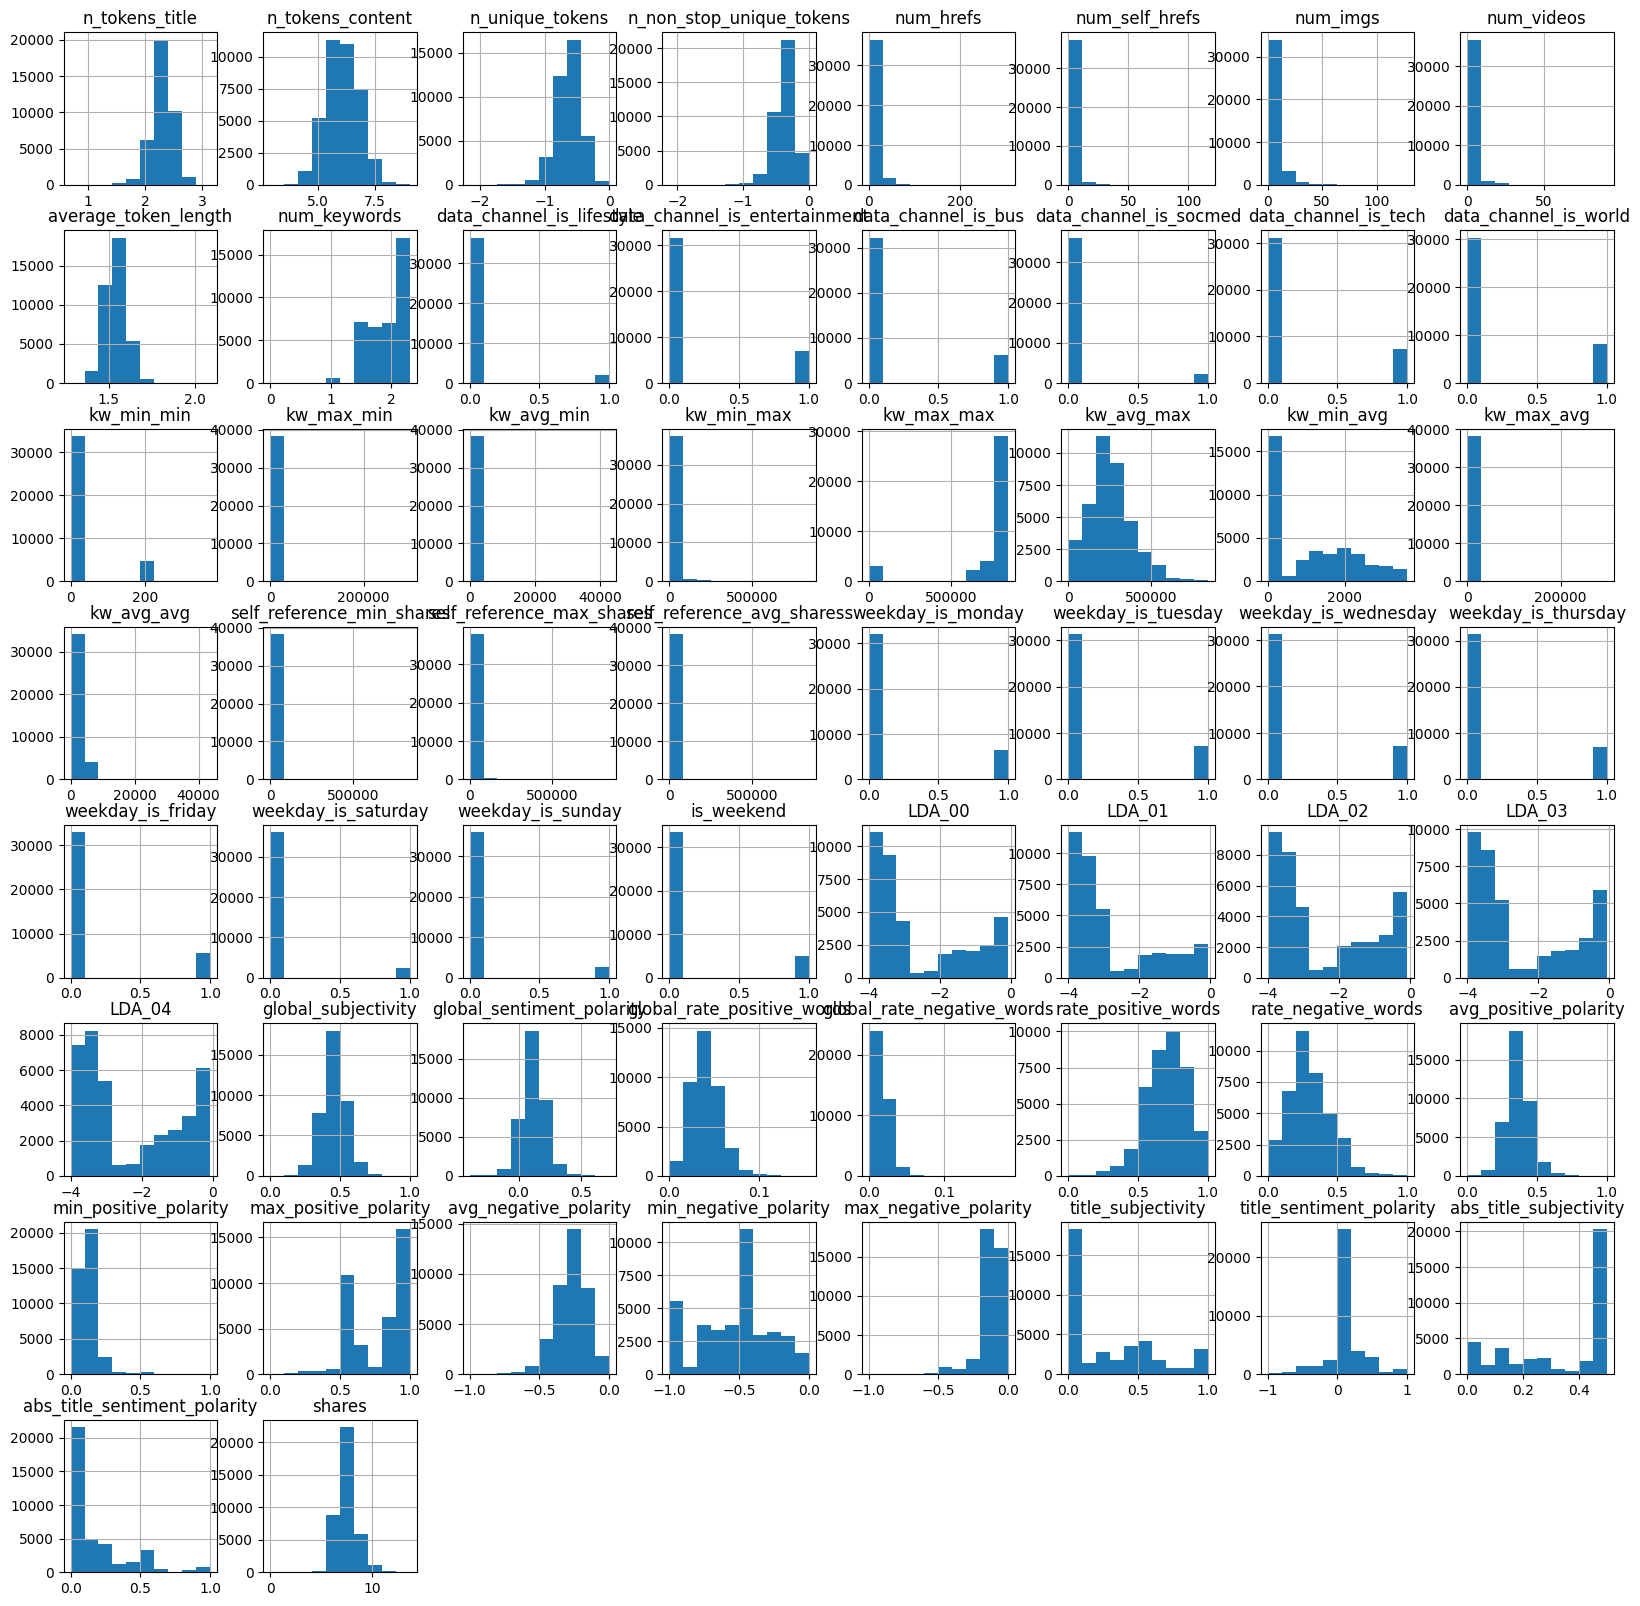

In [195]:
# Evaluating the impact of log transformation
df.hist(figsize=(20,20))
plt.show()

### Scalling The Data
A scaler that is immune to outliers needs to be used because there is a lot of outliers in the given data.

In [196]:
num_of_nowords=df2[df2['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)
df2  = df2[df2['n_tokens_content'] != 0]
# Comment - Visualizing the n_non_stop_words data field shows that the present of a record with 1042 value, 
# futher observation of that data shows that it belongs to entertainment which is not actually. It belongs to world news or others.
# this particluar also contains 0 on a lot of attributes. This record is classifed as a noise and will be remove.
df2 = df2[df2['n_non_stop_words'] != 1042]

number of news items with no words 1181


In [197]:
df2

,index,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,ner_counts,neg,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index,TTR,Hapax_Ratio
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,...,"{'ORG': 8, 'DATE': 3, 'WORK_OF_ART': 2, 'GPE':...",-0.541350,0.470178,-0.019750,0.497976,0.848267,1.010549,1.010189,0.661692,0.527363
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,...,"{'ORG': 12, 'PERSON': 2, 'DATE': 3, 'GPE': 1, ...",-1.521802,1.812844,-1.070012,0.440432,0.724251,1.291959,0.897768,0.591667,0.445833
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,...,"{'DATE': 9, 'ORG': 7, 'PERSON': 3, 'FAC': 1, '...",-1.084649,-0.144783,0.846919,0.752670,0.075881,0.241063,-0.112047,0.578035,0.433526
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,...,"{'ORG': 19, 'PERSON': 1, 'NORP': 6, 'FAC': 8, ...",-1.272251,-0.191707,0.951621,0.819121,-1.029631,-0.832408,-1.058647,0.488889,0.351893
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,...,"{'GPE': 2, 'ORG': 15, 'CARDINAL': 1, 'DATE': 2...",-1.272251,0.925713,-0.180452,0.696088,-0.338715,-0.050675,0.195376,0.536496,0.368613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,...,"{'ORG': 10, 'WORK_OF_ART': 2, 'PERCENT': 1, 'C...",-0.618794,0.925713,-0.478579,0.244578,1.482015,1.950751,1.471372,0.601533,0.453846
39640,39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,...,"{'GPE': 4, 'ORG': 3, 'PERSON': 5, 'WORK_OF_ART...",-0.251726,0.030962,0.300218,0.123618,-1.399838,-1.709948,-0.408741,0.608247,0.340206
39641,39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,...,"{'WORK_OF_ART': 1, 'ORG': 2, 'GPE': 1, 'PERSON...",-0.184074,-0.508451,0.862102,0.635343,-0.726035,-0.786239,-0.647708,0.710744,0.512397
39642,39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,...,"{'NORP': 13, 'DATE': 18, 'CARDINAL': 5, 'TIME'...",1.659335,-0.253613,-1.520897,-1.844699,1.131043,0.742273,1.066833,0.490470,0.341401


In [156]:
df2[['neg', 'neu','pos', 'compound', 'flesch_kincaid', 'gunning_fog', 'smog_index', 'TTR','Hapax_Ratio']]

,neg,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index,TTR,Hapax_Ratio
0,-0.541350,0.470178,-0.019750,0.497976,0.848267,1.010549,1.010189,0.661692,0.527363
1,-1.521802,1.812844,-1.070012,0.440432,0.724251,1.291959,0.897768,0.591667,0.445833
2,-1.084649,-0.144783,0.846919,0.752670,0.075881,0.241063,-0.112047,0.578035,0.433526
3,-1.272251,-0.191707,0.951621,0.819121,-1.029631,-0.832408,-1.058647,0.488889,0.351893
4,-1.272251,0.925713,-0.180452,0.696088,-0.338715,-0.050675,0.195376,0.536496,0.368613
...,...,...,...,...,...,...,...,...,...
39639,-0.618794,0.925713,-0.478579,0.244578,1.482015,1.950751,1.471372,0.601533,0.453846
39640,-0.251726,0.030962,0.300218,0.123618,-1.399838,-1.709948,-0.408741,0.608247,0.340206
39641,-0.184074,-0.508451,0.862102,0.635343,-0.726035,-0.786239,-0.647708,0.710744,0.512397
39642,1.659335,-0.253613,-1.520897,-1.844699,1.131043,0.742273,1.066833,0.490470,0.341401


In [ ]:
specific_columns = df2[['neg', 'neu','pos', 'compound', 'flesch_kincaid', 'gunning_fog', 'smog_index', 'TTR','Hapax_Ratio']]
new_df = pd.concat([df,specific_columns], axis=1)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,popularity,neg,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index,TTR,Hapax_Ratio
0,0.633761,-0.636134,0.812511,0.900322,-0.444444,-0.333333,0.000000,0.0,0.017077,-0.829843,...,6.385194,-0.541350,0.470178,-0.019750,0.497976,0.848267,1.010549,1.010189,0.661692,0.527363
1,-0.366239,-0.489067,0.436352,0.737809,-0.555556,-0.666667,0.000000,0.0,0.639381,-1.380182,...,6.566672,-1.521802,1.812844,-1.070012,0.440432,0.724251,1.291959,0.897768,0.591667,0.445833
2,-0.366239,-0.672094,0.232983,-0.245159,-0.555556,-0.666667,0.000000,0.0,-0.792272,-0.380182,...,7.313220,-1.084649,-0.144783,0.846919,0.752670,0.075881,0.241063,-0.112047,0.578035,0.433526
3,-0.366239,0.219733,-0.303464,-0.230330,0.111111,-1.000000,0.000000,0.0,-0.758746,0.000000,...,7.090077,-1.272251,-0.191707,0.951621,0.819121,-1.029631,-0.832408,-1.058647,0.488889,0.351893
4,0.911994,0.898597,-1.082464,-1.386651,1.222222,5.333333,6.333333,0.0,0.023826,0.000000,...,6.224558,-1.272251,0.925713,-0.180452,0.696088,-0.338715,-0.050675,0.195376,0.536496,0.368613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.618794,0.925713,-0.478579,0.244578,1.482015,1.950751,1.471372,0.601533,0.453846
39640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.251726,0.030962,0.300218,0.123618,-1.399838,-1.709948,-0.408741,0.608247,0.340206
39641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.184074,-0.508451,0.862102,0.635343,-0.726035,-0.786239,-0.647708,0.710744,0.512397
39642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.659335,-0.253613,-1.520897,-1.844699,1.131043,0.742273,1.066833,0.490470,0.341401


In [148]:
new_df.columns.get_loc('shares')

57

In [149]:
new_df.columns.get_loc('popularity')

58

In [150]:
new_df.shape

(39518, 68)

In [151]:
new_df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,popularity,neg,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index,TTR,Hapax_Ratio
0,0.633761,-0.636134,0.812511,0.900322,-0.444444,-0.333333,0.000000,0.0,0.017077,-0.829843,...,6.385194,-0.541350,0.470178,-0.019750,0.497976,0.848267,1.010549,1.010189,0.661692,0.527363
1,-0.366239,-0.489067,0.436352,0.737809,-0.555556,-0.666667,0.000000,0.0,0.639381,-1.380182,...,6.566672,-1.521802,1.812844,-1.070012,0.440432,0.724251,1.291959,0.897768,0.591667,0.445833
2,-0.366239,-0.672094,0.232983,-0.245159,-0.555556,-0.666667,0.000000,0.0,-0.792272,-0.380182,...,7.313220,-1.084649,-0.144783,0.846919,0.752670,0.075881,0.241063,-0.112047,0.578035,0.433526
3,-0.366239,0.219733,-0.303464,-0.230330,0.111111,-1.000000,0.000000,0.0,-0.758746,0.000000,...,7.090077,-1.272251,-0.191707,0.951621,0.819121,-1.029631,-0.832408,-1.058647,0.488889,0.351893
4,0.911994,0.898597,-1.082464,-1.386651,1.222222,5.333333,6.333333,0.0,0.023826,0.000000,...,6.224558,-1.272251,0.925713,-0.180452,0.696088,-0.338715,-0.050675,0.195376,0.536496,0.368613


In [152]:
new_df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,popularity,neg,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index,TTR,Hapax_Ratio
count,38462.000000,38462.000000,3.846200e+04,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,3.846200e+04,38462.000000,...,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000,38462.000000
mean,0.055385,0.019730,-4.537476e-02,-0.067014,0.357542,0.131532,1.187284,1.263819,1.462391e-02,-0.024494,...,7.469257,-0.005021,0.002839,0.001252,0.004617,-0.000718,-0.000002,0.000215,0.601353,0.455141
std,0.734376,0.703262,7.892188e-01,0.881549,1.260081,1.289892,2.764031,4.164945,7.649592e-01,0.730880,...,0.925474,0.998368,1.000541,0.999353,0.997308,0.998824,0.998269,0.996970,0.123591,0.132931
min,-5.594502,-3.050697,-6.288232e+00,-9.816826,-0.888889,-1.000000,-0.333333,0.000000,-3.339512e+00,-4.799205,...,0.000000,-1.521802,-4.198865,-2.630009,-1.844964,-7.138096,-7.994899,-3.788113,0.134082,0.000000
25%,-0.366239,-0.474026,-5.212187e-01,-0.514063,-0.333333,-0.666667,0.000000,0.000000,-4.962232e-01,-0.380182,...,6.851185,-0.821886,-0.680505,-0.682347,-0.700552,-0.627414,-0.619037,-0.600520,0.511945,0.358289
50%,0.000000,0.000000,2.248500e-16,0.000000,0.000000,0.000000,0.000000,0.000000,-1.419955e-15,0.000000,...,7.244228,-0.070025,-0.001427,-0.000133,0.558257,0.030834,0.019641,-0.061552,0.590517,0.435821
75%,0.633761,0.525974,4.787813e-01,0.485937,0.666667,0.333333,1.000000,1.000000,5.037768e-01,0.619818,...,7.901007,0.770730,0.684645,0.674769,0.767182,0.640583,0.638046,0.567456,0.685039,0.536364
max,2.895242,2.896457,2.473554e+00,2.037529,32.888889,37.666667,42.333333,91.000000,6.939483e+00,0.879669,...,13.645078,2.456366,3.040731,4.022778,0.829422,11.435921,11.584901,14.110846,1.000000,1.000000


In [153]:
new_df

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,popularity,neg,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index,TTR,Hapax_Ratio
0,0.633761,-0.636134,0.812511,0.900322,-0.444444,-0.333333,0.000000,0.0,0.017077,-0.829843,...,6.385194,-0.541350,0.470178,-0.019750,0.497976,0.848267,1.010549,1.010189,0.661692,0.527363
1,-0.366239,-0.489067,0.436352,0.737809,-0.555556,-0.666667,0.000000,0.0,0.639381,-1.380182,...,6.566672,-1.521802,1.812844,-1.070012,0.440432,0.724251,1.291959,0.897768,0.591667,0.445833
2,-0.366239,-0.672094,0.232983,-0.245159,-0.555556,-0.666667,0.000000,0.0,-0.792272,-0.380182,...,7.313220,-1.084649,-0.144783,0.846919,0.752670,0.075881,0.241063,-0.112047,0.578035,0.433526
3,-0.366239,0.219733,-0.303464,-0.230330,0.111111,-1.000000,0.000000,0.0,-0.758746,0.000000,...,7.090077,-1.272251,-0.191707,0.951621,0.819121,-1.029631,-0.832408,-1.058647,0.488889,0.351893
4,0.911994,0.898597,-1.082464,-1.386651,1.222222,5.333333,6.333333,0.0,0.023826,0.000000,...,6.224558,-1.272251,0.925713,-0.180452,0.696088,-0.338715,-0.050675,0.195376,0.536496,0.368613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.618794,0.925713,-0.478579,0.244578,1.482015,1.950751,1.471372,0.601533,0.453846
39640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.251726,0.030962,0.300218,0.123618,-1.399838,-1.709948,-0.408741,0.608247,0.340206
39641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.184074,-0.508451,0.862102,0.635343,-0.726035,-0.786239,-0.647708,0.710744,0.512397
39642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.659335,-0.253613,-1.520897,-1.844699,1.131043,0.742273,1.066833,0.490470,0.341401


In [143]:
column57 = new_df.iloc[:,57]

new_df = new_df.drop(new_df.columns[57], axis=1)

df['shares'] = column57

column58 = new_df.iloc[:,58]

new_df = new_df.drop(new_df.columns[58], axis=1)

df['popularity'] = column57


In [146]:
new_df.iloc[:, :-2]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,popularity,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index
0,2.484907,5.389072,-0.410084,-0.204095,4.0,2.0,1.0,0.0,1.543376,1.609438,...,-0.187500,0.000000,0.187500,Unpopular,0.470178,-0.019750,0.497976,0.848267,1.010549,1.010189
1,2.197225,5.541264,-0.502952,-0.233262,3.0,1.0,1.0,0.0,1.592032,1.386294,...,0.000000,0.500000,0.000000,Unpopular,1.812844,-1.070012,0.440432,0.724251,1.291959,0.897768
2,2.197225,5.351858,-0.553160,-0.409676,3.0,1.0,1.0,0.0,1.480095,1.791759,...,0.000000,0.500000,0.000000,Popular,-0.144783,0.846919,0.752670,0.075881,0.241063,-0.112047
3,2.197225,6.274762,-0.685600,-0.407014,9.0,0.0,1.0,0.0,1.482717,1.945910,...,0.000000,0.500000,0.000000,Unpopular,-0.191707,0.951621,0.819121,-1.029631,-0.832408,-1.058647
4,2.564949,6.977281,-0.877922,-0.614540,19.0,19.0,20.0,0.0,1.543904,1.945910,...,0.136364,0.045455,0.136364,Unpopular,0.925713,-0.180452,0.696088,-0.338715,-0.050675,0.195376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.925713,-0.478579,0.244578,1.482015,1.950751,1.471372
39640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.030962,0.300218,0.123618,-1.399838,-1.709948,-0.408741
39641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.508451,0.862102,0.635343,-0.726035,-0.786239,-0.647708
39642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.253613,-1.520897,-1.844699,1.131043,0.742273,1.066833


In [145]:
# scale the data
# StandardScaler cannot guarantee balanced feature scales in the presence of outliers.
# StandardScaler removes the mean and scales the data to unit variance.
# However, the outliers have an influence when
# computing the empirical mean and standard deviation which shrink the range of the feature values 

# source: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py


# Scale features using statistics that are robust to outliers.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# scalled all the feature selections aside shares and populairty
scalled_data = scaler.fit_transform(new_df.iloc[:, :-2])

# update the dataframe back with the scalled data
new_df.iloc[:, :-2] = scalled_data

ValueError: could not convert string to float: 'Unpopular'

In [ ]:
new_df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,neg,neu,pos,compound,flesch_kincaid,gunning_fog,smog_index,TTR,Hapax_Ratio,shares
count,39643.000000,39643.000000,39643.000000,3.964300e+04,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,39643.000000,...,7781.000000,6491.000000,6326.000000,0.0,5898.000000,5724.000000,5641.000000,39643.000000,39643.000000,39643.000000
mean,0.026531,0.292530,-0.062897,-6.905629e+06,-0.137169,0.288369,0.097823,1.180990,1.249905,-0.307734,...,-0.317469,-0.253153,-0.184617,NaN,-0.201768,-0.199127,-0.228338,-0.010807,0.109242,0.212506
std,0.766665,1.002309,0.994799,3.940939e+07,1.195084,1.133216,1.285014,2.768754,4.107902,2.243185,...,1.097391,1.009950,0.802224,NaN,0.781980,0.889292,0.945273,0.720103,0.746960,0.857479
min,-9.757352,-0.870213,-3.912219,-2.318034e+08,-5.357069,-0.800000,-1.000000,-0.333333,0.000000,-12.390093,...,-5.259974,-4.318989,-2.874339,NaN,-2.349655,-4.112655,-2.736894,-5.078164,-2.438778,-6.675894
25%,-0.380668,-0.346809,-0.495896,-6.108020e-01,-0.502312,-0.400000,-0.666667,0.000000,0.000000,-0.493244,...,-0.615719,-0.592705,-0.601684,NaN,-0.651559,-0.596981,-0.566938,-0.489457,-0.435210,-0.361232
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.619332,0.653191,0.504104,3.891980e-01,0.497688,0.600000,0.333333,1.000000,1.000000,0.506756,...,0.384281,0.407295,0.398316,NaN,0.348441,0.403019,0.433062,0.510543,0.564790,0.638768
max,2.509380,17.159574,3.343169,8.836347e-01,2.401445,29.600000,37.666667,42.333333,91.000000,8.972190,...,0.880743,0.991937,1.126097,NaN,1.438595,1.661562,1.579197,1.806451,3.160107,5.898683


In [82]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [85]:
# Kmeans perform poorly on high feature space
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(df.iloc[:,:-1])
reduced_data.shape

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values